In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
## Clinical Trial Trends & Pharma Analytics
##This project analyzes real-world clinical trial data to understand
##research trends across trial phases, sponsors, diseases, and outcomes.

In [2]:
df=pd.read_csv("clinical.csv.csv")

In [3]:
df.head()

,index,NCT,Sponsor,Title,Summary,Start_Year,Start_Month,Phase,Enrollment,Status,Condition
0,0,NCT00003305,Sanofi,A Phase II Trial of Aminopterin in Adults and ...,RATIONALE: Drugs used in chemotherapy use diff...,1997,7,Phase 2,75,Completed,Leukemia
1,1,NCT00003821,Sanofi,Phase II Trial of Aminopterin in Patients With...,RATIONALE: Drugs used in chemotherapy use diff...,1998,1,Phase 2,0,Withdrawn,Endometrial Neoplasms
2,2,NCT00004025,Sanofi,"Phase I/II Trial of the Safety, Immunogenicity...",RATIONALE: Vaccines made from a person's white...,1999,3,Phase 1/Phase 2,36,Unknown status,Melanoma
3,3,NCT00005645,Sanofi,Phase II Trial of ILX295501 Administered Orall...,RATIONALE: Drugs used in chemotherapy use diff...,1999,5,Phase 2,0,Withdrawn,Ovarian Neoplasms
4,4,NCT00008281,Sanofi,"A Multicenter, Open-Label, Randomized, Three-A...",RATIONALE: Drugs used in chemotherapy use diff...,2000,10,Phase 3,0,Unknown status,Colorectal Neoplasms


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13748 entries, 0 to 13747
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        13748 non-null  int64 
 1   NCT          13748 non-null  object
 2   Sponsor      13748 non-null  object
 3   Title        13604 non-null  object
 4   Summary      13748 non-null  object
 5   Start_Year   13748 non-null  int64 
 6   Start_Month  13748 non-null  int64 
 7   Phase        13485 non-null  object
 8   Enrollment   13748 non-null  int64 
 9   Status       13748 non-null  object
 10  Condition    13748 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [5]:
df.describe()

,index,Start_Year,Start_Month,Enrollment
count,13748.000000,13748.000000,13748.000000,13748.000000
mean,6873.500000,2009.155586,6.691155,440.783678
std,3968.850085,4.797615,3.486359,1944.530768
min,0.000000,1984.000000,1.000000,0.000000
25%,3436.750000,2006.000000,4.000000,40.000000
50%,6873.500000,2009.000000,7.000000,124.000000
75%,10310.250000,2013.000000,10.000000,365.000000
max,13747.000000,2020.000000,12.000000,84496.000000


In [6]:
df.isnull().sum()

index            0
NCT              0
Sponsor          0
Title          144
Summary          0
Start_Year       0
Start_Month      0
Phase          263
Enrollment       0
Status           0
Condition        0
dtype: int64

In [7]:
df['Enrollment'] = df['Enrollment'].fillna(0)


In [8]:
df=df.drop_duplicates( subset='NCT')

In [9]:
df.columns=df.columns.str.strip().str.lower().str.replace(" ","-")

In [10]:
df['phase'].value_counts()


phase
Phase 3            4887
Phase 2            3596
Phase 1            2516
Phase 4            2015
Phase 1/Phase 2     322
Phase 2/Phase 3     139
Early Phase 1        10
Name: count, dtype: int64

In [11]:
df['status'].value_counts()

status
Completed                  10568
Terminated                  1285
Recruiting                   800
Active, not recruiting       646
Withdrawn                    291
Not yet recruiting           108
Unknown status                19
Suspended                     16
Enrolling by invitation       15
Name: count, dtype: int64

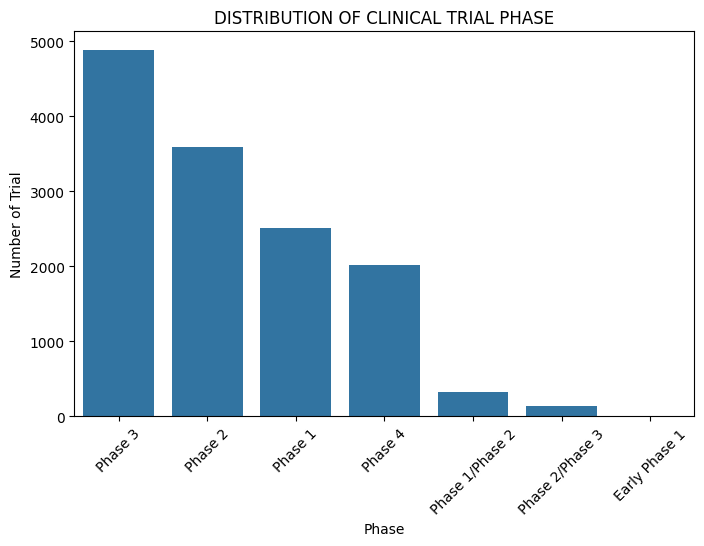

In [12]:
#VISUALIZE THE PHASE DISTRIBUTION
plt.figure(figsize=(8,5))
sns.countplot(x='phase',data=df,order=df['phase'].value_counts().index)
plt.title('DISTRIBUTION OF CLINICAL TRIAL PHASE')
plt.xlabel("Phase")
plt.ylabel("Number of Trial")
plt.xticks(rotation=45)
plt.show()

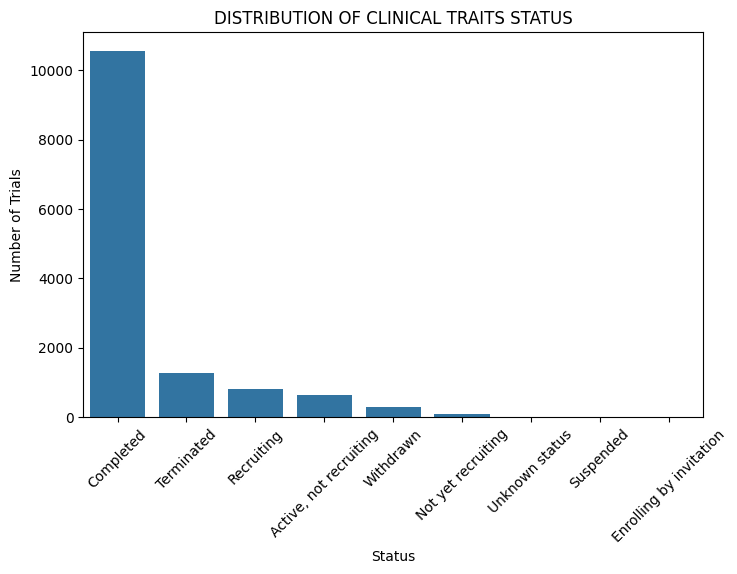

In [13]:
#VISULIZATION OF STATUS
plt.figure(figsize=(8,5))
sns.countplot(x='status',data=df,order=df['status'].value_counts().index)
plt.title('DISTRIBUTION OF CLINICAL TRAITS STATUS')
plt.xlabel('Status')
plt.ylabel('Number of Trials')
plt.xticks(rotation=45)
plt.show()

In [14]:
#cross tab between status and phase 

phase_status= pd.crosstab(df['phase'],df['status'])
print(phase_status)

status           Active, not recruiting  Completed  Enrolling by invitation  \
phase                                                                         
Early Phase 1                         0         10                        0   
Phase 1                              93       1977                        1   
Phase 1/Phase 2                      39        174                        1   
Phase 2                             155       2646                        3   
Phase 2/Phase 3                       7         89                        1   
Phase 3                             318       3795                        9   
Phase 4                              29       1659                        0   

status           Not yet recruiting  Recruiting  Suspended  Terminated  \
phase                                                                    
Early Phase 1                     0           0          0           0   
Phase 1                          22         167          8        

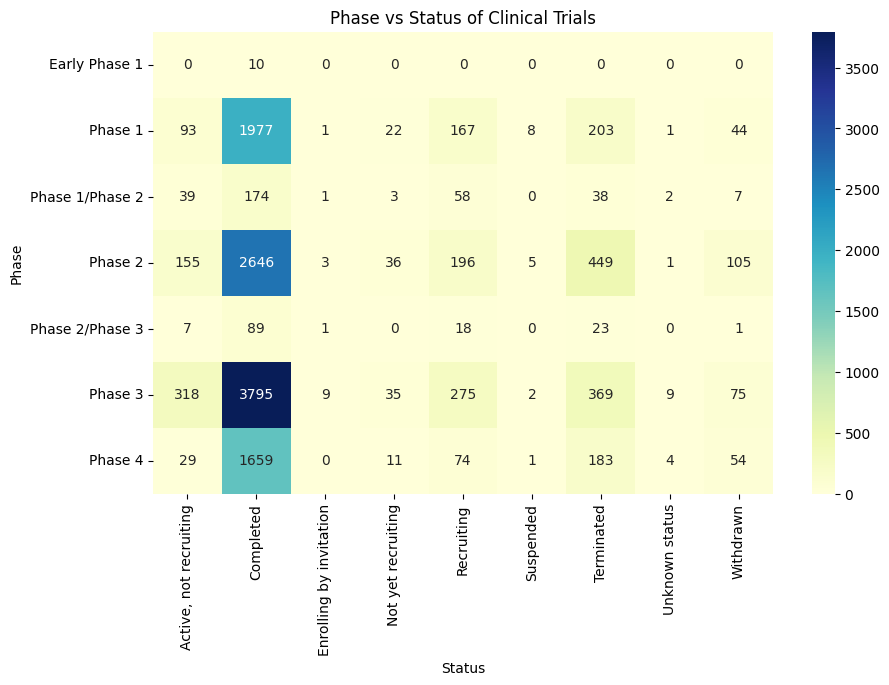

In [15]:
#VISUALIZE THE PHASE AND STATUS BY HEATMAP
plt.figure(figsize=(10,6))
sns.heatmap(phase_status, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Phase vs Status of Clinical Trials')
plt.xlabel('Status')
plt.ylabel('Phase')
plt.show()


In [16]:

df['enrollment'].describe()

count    13748.000000
mean       440.783678
std       1944.530768
min          0.000000
25%         40.000000
50%        124.000000
75%        365.000000
max      84496.000000
Name: enrollment, dtype: float64

In [17]:
df_enroll = df[df['enrollment'].notna()&(df['enrollment']>0)]

In [18]:
avg_enrollment_phase=df_enroll.groupby('phase')['enrollment'].mean().sort_values(ascending=False)
print("Average Enrollment by Phase:")
print(avg_enrollment_phase)

Average Enrollment by Phase:
phase
Phase 3            815.485217
Phase 2/Phase 3    578.176471
Phase 4            537.924266
Phase 2            187.248627
Phase 1/Phase 2    103.725806
Early Phase 1       58.200000
Phase 1             52.419486
Name: enrollment, dtype: float64


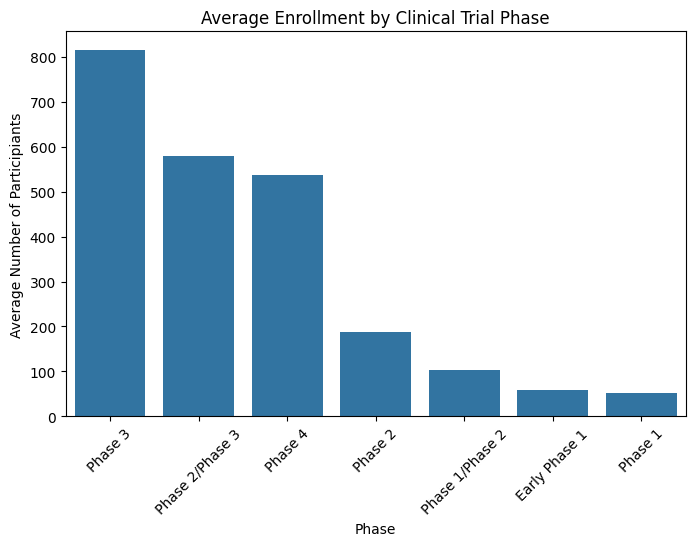

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(x=avg_enrollment_phase.index,y=avg_enrollment_phase.values)
plt.title('Average Enrollment by Clinical Trial Phase')
plt.xlabel('Phase')
plt.ylabel('Average Number of Participiants')
plt.xticks(rotation =45)
plt.show()


In [20]:
avg_enrollment_status=df_enroll.groupby('status')['enrollment'].mean().sort_values(ascending=False)
print('Average Enrollment by Status')
print(avg_enrollment_status)

Average Enrollment by Status
status
Unknown status             1718.133333
Active, not recruiting      572.493808
Enrolling by invitation     531.266667
Recruiting                  512.767500
Completed                   462.730508
Terminated                  293.294902
Withdrawn                   282.666667
Not yet recruiting          282.601852
Suspended                   241.625000
Name: enrollment, dtype: float64


In [21]:
plt.figure(figsize=8,5))
sns.barplot(x=avg_enrollment_status.index,y=avg_enrollment_status.values)
plt.title('Average Enrollment by Trial Status')
plt.xlabel('Status')
plt.ylabel('Average Number by Participiants')
plt.xticks(rotation=45)
plt.show()

SyntaxError: unmatched ')' (349492790.py, line 1)

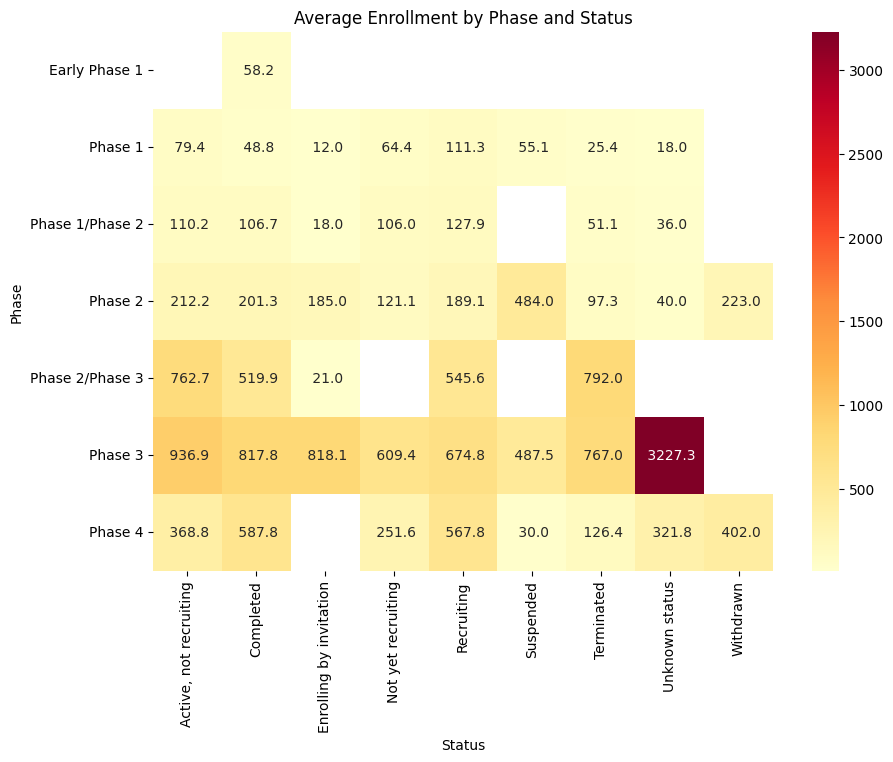

In [29]:



enrollment_phase_status=df_enroll.pivot_table(index='phase',columns='status',values='enrollment',aggfunc='mean')
plt.figure(figsize=(10,7))
sns.heatmap(enrollment_phase_status, annot=True, fmt=" .1f",cmap='YlOrRd')
plt.title('Average Enrollment by Phase and Status')
plt.xlabel('Status')
plt.ylabel('Phase')
plt.show()

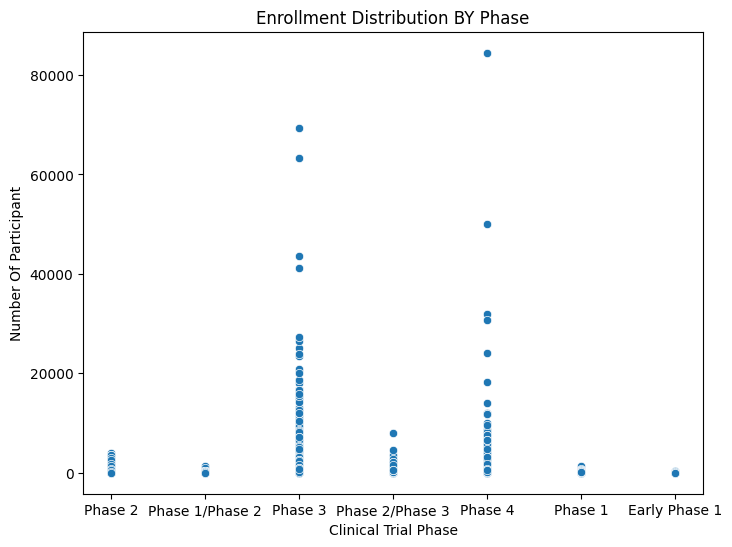

In [24]:
#Enrollment Comparrision
plt.figure(figsize=(8,6))
sns.scatterplot(x='phase',y='enrollment',data=df)
plt.title('Enrollment Distribution BY Phase')
plt.xlabel('Clinical Trial Phase')
plt.ylabel('Number Of Participant')
plt.show()

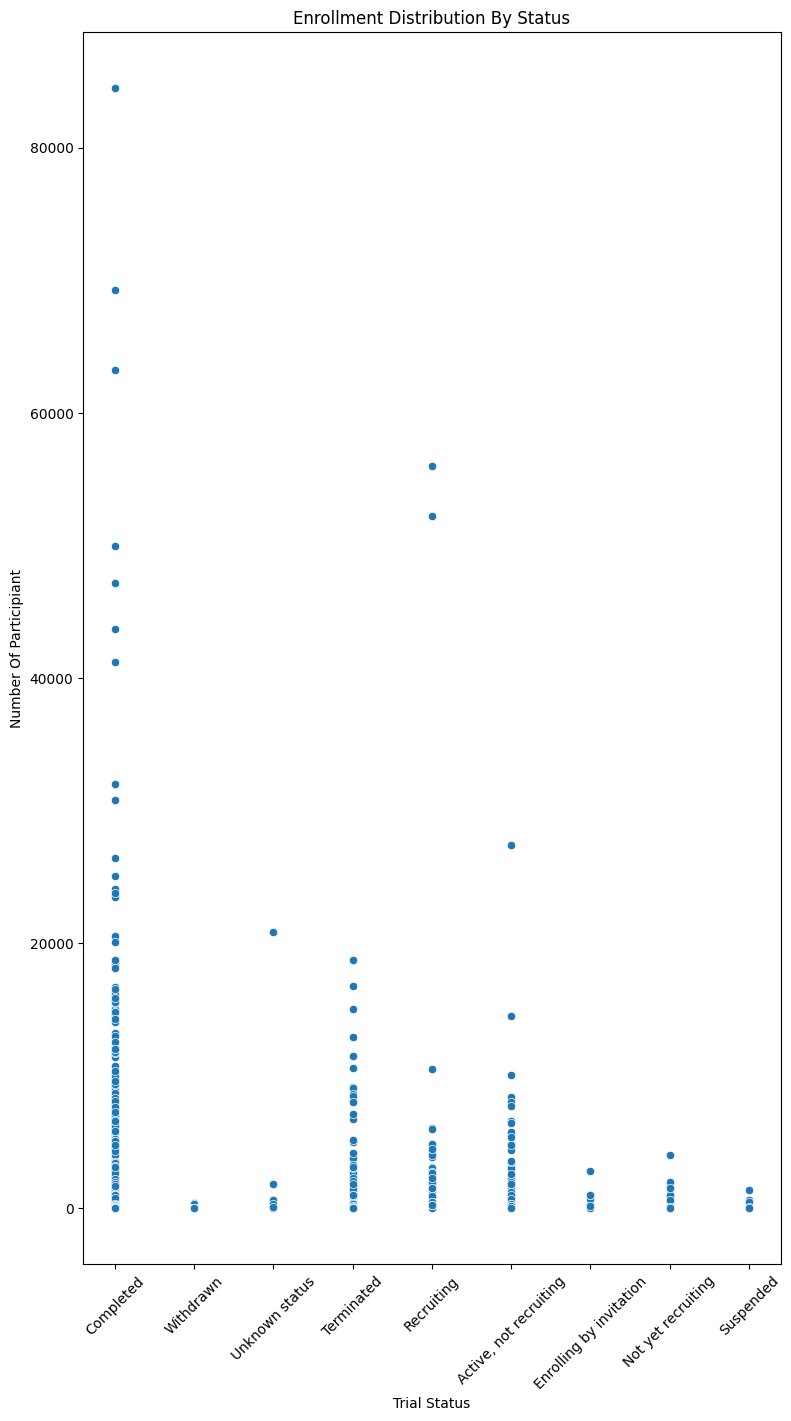

In [30]:
#Enrollment Comparrision BY Status
plt.figure(figsize=(9,16))
sns.scatterplot(x='status',y='enrollment',data=df)
plt.title('Enrollment Distribution By Status')
plt.xlabel('Trial Status')
plt.ylabel('Number Of Participiant')
plt.xticks(rotation=45)
plt.show()